In [106]:
#import Matplotlib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [107]:
#import dependencies and sqlalchemy 
import numpy as np
import pandas as pd
import datetime as dt

## Step 1 - Reflect Tables into SQLAlchemy ORM

In [108]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [109]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [110]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [111]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [112]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [114]:
 # Create our session (link) from Python to the DB
session = Session(engine)

In [136]:
##-----------------------------Exploratory Precipitation Analysis------------------------------------------------

In [155]:
# Find the most recent date in the data set.
recent_dt =session.query(measurement.date).order_by(measurement.date.desc()).first()
print("Recent date in database is: " , recent_dt)

Recent date in database is:  ('2017-08-23',)


In [156]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

Lastprcp_rain = session.query(measurement.prcp , measurement.date).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()
Lastprcp_rain

[(0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),
 (0.35, '2016-08-29'),
 (0.9, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.02, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (

In [139]:
# Calculate the date one year from the last date in data set.
One_year_dt = dt.date(2017,8,23) - dt.timedelta(days=365)
print('The date of one year is:', One_year_dt)

The date of one year is: 2016-08-23


In [157]:
# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(measurement.date, measurement.prcp).\
        filter(measurement.date >= '2016-08-24', measurement.date <= '2017-08-23').\
        order_by(measurement.date).all()
precip_scores

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [141]:
# Save the query results as a Pandas DataFrame and set the index to the date column
year_df = pd.DataFrame(data=yr_precip)
year_df.head(15)

,0,1
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


In [151]:
# Sort the dataframe by date

date_df = pd.DataFrame(Lastprcp_rain, columns = ['Precipitation', 'Dates'])
date_df.set_index('Dates')


,Precipitation
Dates,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


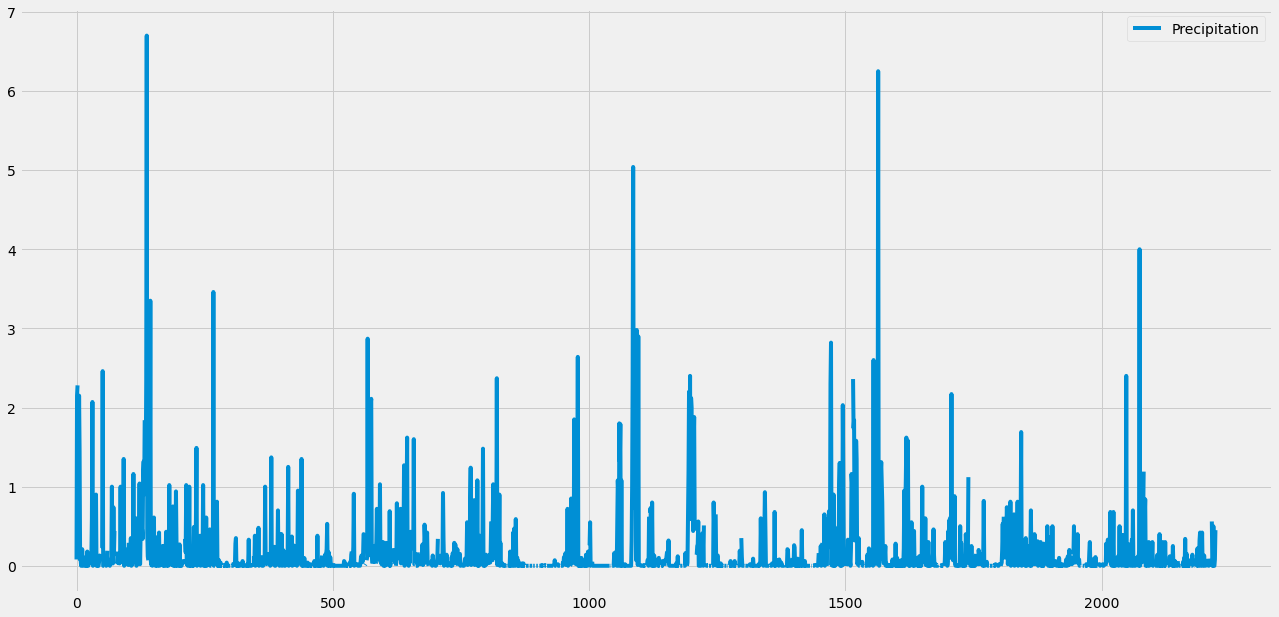

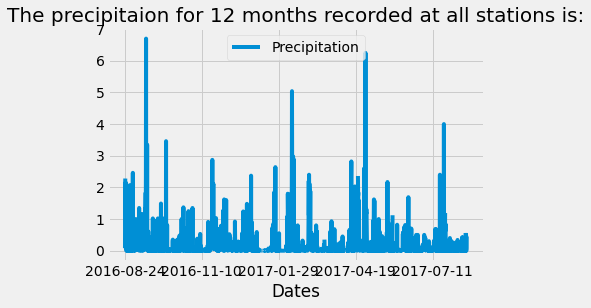

In [152]:
# Use Pandas Plotting with Matplotlib to plot the data

#Determine the plot size
date_df.plot(figsize=(20,10))

# Use Pandas Plotting with Matplotlib to plot the data
date_df.plot(x = 'Dates' , grid = True)


plt.title("The precipitaion for 12 months recorded at all stations is:" , size = 20)
plt.show()

In [153]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [158]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(func.count(measurement.station)).all()
num_stations

[(19550,)]

In [159]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station,func.count(measurement.station)).\
        group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [162]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = [func.min(measurement.tobs),
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]
                
session.query(*sel).filter(measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

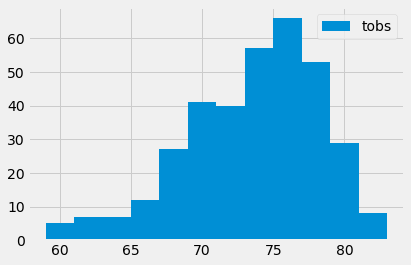

In [164]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histo = session.query(measurement.tobs).\
                                filter(measurement.station=='USC00519281').\
                                filter(measurement.date >= One_year_dt).\
                                order_by(measurement.date.desc()).all()

x = [x[0] for x in histogram]


plt.hist(x, bins=12)
plt.legend(['tobs'])
plt.show()

# Close session

In [135]:
# Close Session
session.close()